# Naive determine image angle

Allows to retreive the angle of the image by using the naive method.
The file are placed here using lsd_tunning notebook

In [12]:
import csv
import cv2
import matplotlib
import numpy as np
import os
import sys

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from demo_utils import *

In [13]:
matplotlib.rcParams["figure.figsize"] = (12, 10)

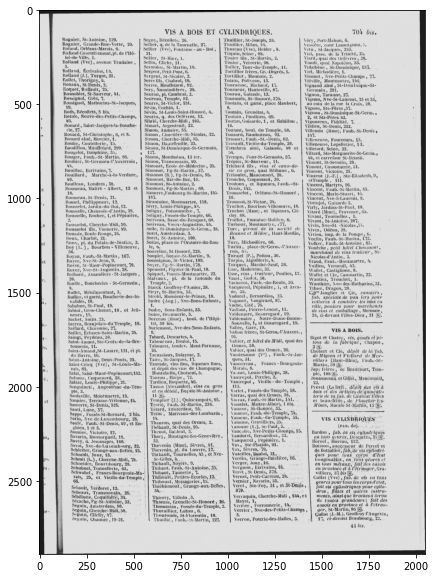

In [16]:
img_path = image_original_path_angle
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [17]:
def get_segments():
    segments = []
    with open(csv_out_path_angle, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            row_as_int = [int(x) for x in row]
            segments.append(row_as_int)
    return segments

segments = get_segments()

In [19]:
vectors = []
for segment in segments:
    x, y, x2, y2 = segment
    vectors.append(np.array([x2-x, y2-y]))

# Angle entre deux droite de vecteurs cliped to positive values and in degrees
def angle_between_vectors(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), 0.0, 1.0)) * 180 / np.pi
    

v0 = np.array([1, 0])

angles = [angle_between_vectors(v0, v) for v in vectors]
print(angles[:5])

kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(angles).reshape(-1, 1))

horizontal = [angles[i] for i in range(len(angles)) if kmeans.labels_[i] == 0]
vertical = [angles[i] for i in range(len(angles)) if kmeans.labels_[i] == 1]

hori_angle = np.mean(horizontal)
vert_angle = np.mean(vertical)

print(f'horizontal: {hori_angle}')
print(f'vertical: {vert_angle}')

hori_angle -= 90

image_angle = np.mean([vert_angle, hori_angle])
print(f'rotation to apply to image: {-image_angle} degrees')

[0.6661999701832053, 0.1495969956030541, 0.29919195159444856, 0.1618520539857374, 0.12620195342202845]
horizontal: 89.49803421349321
vertical: 0.20696227603806952
rotation to apply to image: 0.14750175523435877 degrees
